In [2]:
import numpy as np
import pandas as pd

In [3]:
np.set_printoptions(precision=10)

In [4]:
N = 1000
sigma = 1
vector = np.random.normal(loc=0, scale=sigma, size=N)

In [5]:
vector

array([ 2.4930289941e+00,  3.0112097135e-01, -4.5062979051e-01,
        1.5005413452e+00, -4.7066765479e-01, -4.4752368110e-01,
       -9.5298944436e-01, -3.3006410807e-01, -8.9929204253e-01,
        4.2760586057e-01, -6.0733309812e-01, -7.7714294474e-01,
       -1.8906028781e-01,  2.3241414216e-01,  2.8612164820e-01,
        1.6889613678e+00, -5.2098712949e-01,  1.2790383953e+00,
        1.9437050179e+00, -1.1392007064e+00, -1.5311861133e-01,
        5.3462058019e-01,  2.7405438923e-01,  4.3511851282e-01,
       -1.1683105996e+00,  5.3604455884e-03,  5.7363142744e-01,
       -9.0237471333e-01,  3.2428903549e-01,  1.0696099952e+00,
        8.3338988305e-01, -1.7363137958e+00, -6.3540128859e-01,
        2.8952739789e-01,  5.7570191091e-01, -1.0991517854e+00,
        4.6832946359e-01,  7.0374168652e-01, -3.6192234457e-01,
       -1.2956635656e+00, -1.0528000134e+00,  1.5459625380e+00,
        8.1025437066e-01,  5.1371535435e-01,  1.7633832808e+00,
       -8.6308240256e-01,  1.1665998715e

In [6]:
cols = []
for i in range(4):
    cols.append(np.apply_along_axis(lambda x: np.power(x, i), 0, vector))
X = np.transpose(np.vstack(cols))
X

array([[ 1.0000000000e+00,  2.4930289941e+00,  6.2151935656e+00,
         1.5494657763e+01],
       [ 1.0000000000e+00,  3.0112097135e-01,  9.0673839387e-02,
         2.7303794592e-02],
       [ 1.0000000000e+00, -4.5062979051e-01,  2.0306720809e-01,
        -9.1508133441e-02],
       ...,
       [ 1.0000000000e+00, -1.2495623893e+00,  1.5614061647e+00,
        -1.9510744179e+00],
       [ 1.0000000000e+00,  2.9903941311e-01,  8.9424570595e-02,
         2.6741471109e-02],
       [ 1.0000000000e+00,  9.3864260426e-02,  8.8104993853e-03,
         8.2699100879e-04]])

In [7]:
Y = np.random.normal(loc=0, scale=sigma, size=N)
Y

array([-7.6812288897e-01,  2.4007305703e-01,  1.0249535223e+00,
       -1.0862261511e+00,  2.8707780706e-01,  6.0463880534e-01,
       -1.0271898372e+00,  3.3576981674e-01, -4.7915226829e-01,
        6.3740174717e-02,  1.4462854904e+00, -1.3275734391e+00,
       -1.0572514039e+00, -4.9280626918e-01, -4.9300727913e-01,
       -1.2762576125e+00, -2.0256728266e+00, -8.2604076678e-01,
        9.0966872344e-01, -5.0490029458e-01, -4.5312390421e-01,
        3.9282838587e-01, -9.6796489042e-01, -1.1703197772e-01,
        6.0131276899e-01,  8.5514224862e-01,  1.9786824117e+00,
       -1.7488141411e+00,  2.2623669188e+00, -3.4738494724e-02,
        5.5897330044e-01,  6.0646773822e-01, -4.5782687967e-01,
        1.6790595160e+00, -2.8778221931e-01,  3.3280645911e-01,
       -6.4953448299e-02,  6.3337838696e-01,  4.9890433967e-01,
       -1.1780494401e+00, -7.5747511228e-01, -5.1797556521e-01,
        2.8865014803e+00, -2.1939043996e+00, -5.2000743463e-01,
       -2.2662296795e-01, -3.2988655171e

In [9]:
V = np.linalg.inv(np.matmul(np.transpose(X), X))
beta_hat = np.matmul(np.matmul(V, np.transpose(X)), Y)
beta_hat

array([ 0.0299379199, -0.0078012757,  0.0093666566,  0.011555735 ])

In [10]:
V

array([[ 1.5270338810e-03, -1.6448055834e-04, -5.2946478753e-04,
         7.8665284672e-05],
       [-1.6448055834e-04,  2.6201036032e-03,  1.8006265714e-04,
        -5.4196701569e-04],
       [-5.2946478753e-04,  1.8006265714e-04,  5.3915350356e-04,
        -1.0387369834e-04],
       [ 7.8665284672e-05, -5.4196701569e-04, -1.0387369834e-04,
         1.8269142624e-04]])

In [11]:
z_95 = 1.645

def confidence_interval(beta, v, sigma):
    return beta - z_95 * np.sqrt(v) * sigma, beta + z_95 * np.sqrt(v) * sigma


def y_hat(x, beta):
    return np.matmul(np.transpose(x), beta)

In [20]:
p = len(beta_hat)

sigma_hat = (1/(N-p-1)) * sum([(y_hat(X[i], beta_hat) - Y[i])**2 for i in range(N)])

In [23]:
beta_low, beta_high = [], []
for j in range(p):
    low, high = confidence_interval(beta_hat[j], V[j,j], sigma_hat)
    beta_low.append(low)
    beta_high.append(high)

In [33]:
y_hat_low = [y_hat(X[i], beta_low) for i in range(N)]
y_hat_medium = [y_hat(X[i], beta_hat) for i in range(N)]
y_hat_high = [y_hat(X[i], beta_high) for i in range(N)]

In [60]:
pd.DataFrame([np.transpose(X)[1], y_hat_low, y_hat_medium, y_hat_high]).transpose().sort_values(by=0)

,0,1,2,3
196,-2.797092,0.239167,-0.127841,-0.494849
565,-2.623353,0.208007,-0.093761,-0.395529
706,-2.520525,0.191245,-0.075934,-0.343113
317,-2.508121,0.189302,-0.073897,-0.337095
136,-2.356006,0.166807,-0.050812,-0.268430
...,...,...,...,...
553,2.893855,-0.826928,0.365847,1.558622
284,2.896573,-0.828414,0.366763,1.561940
345,2.900241,-0.830422,0.368002,1.566427
589,3.398402,-1.136346,0.565149,2.266645


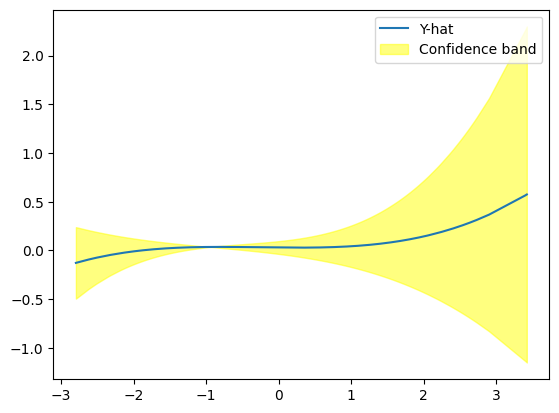

In [61]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame([np.transpose(X)[1], y_hat_low, y_hat_medium, y_hat_high]).transpose().sort_values(by=0)

plt.plot(data[0], data[2], label='Y-hat')
plt.fill_between(data[0], data[1], data[3], color='yellow', alpha=0.5, label='Confidence band')

plt.legend()
plt.show()
